# Visualization: common to discrete-time and continuous-time systems
    - read results in yaml files (sumup.yaml for summary of analysis parameters, samplesreachset.yaml for sample trajectories and approxreachset.yaml for reachability results)

## Reading result files

In [178]:
# convert in python script by: jupyter nbconvert --to script Visu_output.ipynb
# run python script by: python3 Visu_output.py --interactive=0 --printvar=-1-2- 
# or python3 Visu_output.py --interactive=0 --printvar=all (to print all variables)

# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

import os.path
from os import path
import yaml

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

os.chdir('../output')



print_interactive = True
variables_to_display="all"

# for reading arguments on command line (use as a script possibly called from the program)
import sys
import re
print(sys.argv[0])
nb_arguments=len(sys.argv)
if (nb_arguments > 1):
    for i in range(1,nb_arguments):
        print(sys.argv[i])
        if re.match("--interactive=*",sys.argv[i]):
            print_interactive = int((sys.argv[i]).split( "=", 1 )[1])
        if re.match("--printvar=*",sys.argv[i]):
            variables_to_display= (sys.argv[i]).split( "=", 1 )[1]
            

if (path.isfile('sumup.yaml')):
    with open('sumup.yaml','r') as data_loaded:
        summary = yaml.safe_load(data_loaded)
        sysdim = summary["sysdim"]
        systype = summary["systype"]
        #print(summary)
        #print(sysdim)
        
# reading sample file
samples_absent = False;
if (path.isfile('samplesreachset.yaml')):
    with open('samplesreachset.yaml','r') as samples:
        data_loaded = yaml.safe_load(samples)
        #sysdim = data_loaded["sysdim"]
        #systype = data_loaded["systype"]
        samples = data_loaded["samples"]
        sample_tn = [sample["tn"] for sample in samples]
        sample_z = []
        for i in range(sysdim):
            sample_z.append([sample["sample"][i] for sample in samples])
        # plt.scatter(z[0],z[1],c='purple',alpha=1.,s=1.,label='estimated reachable states')
else:
    samples_absent = True;
        
# reading approx file
# make sure this works also when several subdivision (the subdivisions are seperated by a whaite line I believe, see how t behaves?)
if (path.isfile('approxreachset.yaml')):
    with open('approxreachset.yaml','r') as approx:
        data_loaded = yaml.safe_load(approx)
        approx = data_loaded["approx"]
        approx_tn = [app["tn"] for app in approx]
        zmin_outer = []
        zmax_outer = []
        zmin_inner = []
        zmax_inner = []
        zmin_center = []
        zmax_center = []
        zmin_exact = []
        zmax_exact = []
        zmin_outer_rob = []
        zmax_outer_rob = []
        zmin_inner_rob = []
        zmax_inner_rob = []
        meanerrorouter = []
        relmeanerrorouter = []
        meanerrorinner = []
        relmeanerrorinner = []
        meanerrordiff = []
        relmeanerrordiff = []
        etaouter = []
        etainner = []
        gamma = []
        for i in range(sysdim):
            zmin_outer.append([app["outer"][2*i] for app in approx])
            zmax_outer.append([app["outer"][2*i+1] for app in approx])
            zmin_inner.append([app["inner"][2*i] for app in approx])
            zmax_inner.append([app["inner"][2*i+1] for app in approx])
            
        if 'etaouter' in approx[0]:
            for i in range(sysdim):
                etaouter.append([app["etaouter"][i] for app in approx])
                etainner.append([app["etainner"][i] for app in approx])
        if 'gamma' in approx[0]:
            for i in range(sysdim):
                gamma.append([app["gamma"][i] for app in approx])
        
        if 'center' in approx[0]:
            for i in range(sysdim):
                zmin_center.append([app["center"][2*i+1] for app in approx])
                zmax_center.append([app["center"][2*i+1] for app in approx])
        if 'exact' in approx[0]:
            for i in range(sysdim):
                zmin_exact.append([app["exact"][2*i+1] for app in approx])
                zmax_exact.append([app["exact"][2*i+1] for app in approx])
        if 'outerrobust' in approx[0]:
            for i in range(sysdim):
                zmin_outer_rob.append([app["outerrobust"][2*i] for app in approx])
                zmax_outer_rob.append([app["outerrobust"][2*i+1] for app in approx])
        if 'innerrobust' in approx[0]:
            for i in range(sysdim):
                zmin_inner_rob.append([app["innerrobust"][2*i] for app in approx])
                zmax_inner_rob.append([app["innerrobust"][2*i+1] for app in approx])
        if 'meanerrorouter' in approx[0]:
            for i in range(sysdim):
                meanerrorouter.append([app["meanerrorouter"][2*i+1] for app in approx])
                relmeanerrorouter.append([app["relmeanerrorouter"][2*i+1] for app in approx])
                meanerrorinner.append([app["meanerroinner"][2*i+1] for app in approx])
                relmeanerrorinner.append([app["relmeanerrorinner"][2*i+1] for app in approx])
        if 'meanerrordiff' in approx[0]:
            for i in range(sysdim):
                meanerrordiff.append([app["meanerrordiff"][2*i+1] for app in approx])
                relmeanerrordiff.append([app["relmeanerrordiff"][2*i+1] for app in approx])
        
        if (int(sysdim) > 1 and 'outer2d' in approx[0]):
            outer2d = [app['outer2d'] for app in approx]
            outer2d_maxskew = []
            outer2d_robskew = []
            if 'maxskew' in outer2d[0][0]:
                outer2d_maxskew = np.zeros((len(approx_tn),sysdim, sysdim, 8), float)
            if 'robskew' in outer2d[0][0]:
                outer2d_robskew = np.zeros((len(approx_tn),sysdim, sysdim, 8), float)
                
            no_iter = 0
            for iter in outer2d:
                for tuple in iter:
                    x1 = int(tuple['x1'])
                    x2 = int(tuple['x2'])
                    if 'maxskew' in tuple:
                        outer2d_maxskew[no_iter][x1][x2]=tuple['maxskew']
                    if 'robskew' in tuple:
                        outer2d_robskew[no_iter][x1][x2]=tuple['robskew']
                no_iter = no_iter+1
        
        if (int(sysdim) > 1 and 'inner2d' in approx[0]):
            inner2d_maxbox = []
            inner2d_maxskew = []
            inner2d_robbox = []
            inner2d = [app['inner2d'] for app in approx]
            if 'maxbox' in inner2d[0][0]:
                inner2d_maxbox = np.zeros((len(approx_tn),sysdim, sysdim, 4), float)
            if 'maxskew' in inner2d[0][0]:
                inner2d_maxskew = np.zeros((len(approx_tn),sysdim, sysdim, 8), float)
            if 'robbox'  in inner2d[0][0]:
                inner2d_robbox  = np.zeros((len(approx_tn),sysdim, sysdim, 4), float)
            if 'robskew'  in inner2d[0][0]:
                inner2d_robskew = np.zeros((len(approx_tn),sysdim, sysdim, 8), float)   
            
            no_iter = 0
            for iter in inner2d:
                for tuple in iter:
                    x1 = int(tuple['x1'])
                    x2 = int(tuple['x2'])
                    if 'maxbox' in tuple:
                        inner2d_maxbox[no_iter][x1][x2]=tuple['maxbox']
                    # plutot changer le test ci-dessous pour recuperer l'info de skew ou pas
                    if 'maxskew' in tuple:
                        inner2d_maxskew[no_iter][x1][x2]=tuple['maxskew']
                    if 'robbox' in tuple:
                        inner2d_robbox[no_iter][x1][x2]=tuple['robbox']
                        inner2d_robskew[no_iter][x1][x2]=tuple['robskew']
                no_iter = no_iter+1
        
        if (int(sysdim) > 2 and 'inner3d' in approx[0]):
            inner3d = [app['inner3d'] for app in approx]
            inner3d_maxbox = np.zeros((len(approx_tn),sysdim,sysdim, sysdim, 6), float)
            inner3d_robbox = []
            if 'robbox' in inner3d[0][0]:
                inner3d_robbox = np.zeros((len(approx_tn),sysdim,sysdim, sysdim, 6), float)
            
            no_iter = 0
            for iter in inner3d:
                for tuple in iter:
                    x1 = int(tuple['x1'])
                    x2 = int(tuple['x2'])
                    x3 = int(tuple['x3'])
                    inner3d_maxbox[no_iter][x1][x2][x3]=tuple['maxbox']
                    if 'robbox' in tuple:
                        inner3d_robbox[no_iter][x1][x2][x3]=tuple['robbox']
                no_iter = no_iter+1

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py
-f
/Users/sylvie/Library/Jupyter/runtime/kernel-2cf07caa-00f2-4b74-bfb4-b4c4af6af2cb.json
[[-0.5, -0.5233215054646773, -0.5720950694725231, -0.6434330971880242, -0.7340713604136124, -0.8404723924579537], [-0.5, -0.2500898233492402, -0.0016416658696980502, 0.24360291407951573, 0.48375455811930845, 0.7168150754042553], [-0.5, -0.6106445959741825, -0.7481530161951131, -0.9130198040375288, -1.1050030860199578, -1.3201947624492876]]
[[0.5, 0.517639647222424, 0.4966362395478232, 0.4307637198881104, 0.31449166540703477, 0.14334692004386673], [0.5, 0.8491052739112528, 1.1936190942460416, 1.5286595087033785, 1.8489463532129524, 2.1488114481978604], [0.5, 0.5813102166760318, 0.6260974487803191, 0.629204644373403, 0.5851459241527379, 0.48534912140468633]]


In [179]:
width_in_inches = 12
height_in_inches = 9
dots_per_inch = 100
#fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
from matplotlib.patches import Rectangle, Polygon
from matplotlib.collections import PatchCollection

def print_xy(no_varx,no_vary,sample,approx,skew):
    
    fig, ax = plt.subplots(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    plt.grid(True,which="both", linestyle='--')
    
    if (sample):
        plt.scatter(sample_z[no_varx],sample_z[no_vary],c='purple',alpha=1.,s=1.,label='sampled states')
    
    if (approx):
        xi = np.zeros((8), float)
        # print maximal outer approximation - if only boxes we print boxes otherwise we print skew boxes
        if len(outer2d_maxskew) == 0 or (not skew):
            for xo1,xo2,yo1,yo2 in zip(zmin_outer[no_varx],zmax_outer[no_varx],zmin_outer[no_vary],zmax_outer[no_vary]):
                car_fig = Rectangle([xo1,yo1],xo2-xo1,yo2-yo1,color='green', ec='black', linewidth=2, alpha=0.1,zorder=1)
                ax.add_patch(car_fig)
            car_fig = Rectangle([xo1,yo1],xo2-xo1,yo2-yo1, label='maximal over-approx.', color='green', ec='black', linewidth=2, alpha=0.1,zorder=1)
            ax.add_patch(car_fig)
        else:
            for no_iter in range(len(outer2d_maxskew)):  
            # maximal skewed box outer-approximation
                for i in range(8):
                    xi[i] = outer2d_maxskew[no_iter][no_varx][no_vary][i]
                car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], color='green', ec='black', linewidth=2,alpha=0.1,zorder=1)
                ax.add_patch(car_fig)
            if (len(outer2d_maxskew) > 0):
                car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], label='maximal over-approx.', color='green', ec='black', linewidth=2,alpha=0.1,zorder=1)
                ax.add_patch(car_fig)
                
        if len(outer2d_robskew) == 0 or (not skew):
            for xo1,xo2,yo1,yo2 in zip(zmin_outer_rob[no_varx],zmax_outer_rob[no_varx],zmin_outer_rob[no_vary],zmax_outer_rob[no_vary]):
                car_fig = Rectangle([xo1,yo1],xo2-xo1,yo2-yo1,color='blue', ec='black', linewidth=2, alpha=0.1,zorder=1)
                ax.add_patch(car_fig)
            car_fig = Rectangle([xo1,yo1],xo2-xo1,yo2-yo1, label='robust over-approx.', color='blue', ec='black', linewidth=2, alpha=0.1,zorder=1)
            ax.add_patch(car_fig)
        else:
            for no_iter in range(len(outer2d_robskew)):  
            # maximal skewed box outer-approximation
                for i in range(8):
                    xi[i] = outer2d_robskew[no_iter][no_varx][no_vary][i]
                car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], color='blue', ec='black', linewidth=2,alpha=0.1,zorder=1)
                ax.add_patch(car_fig)
            if (len(outer2d_robskew) > 0):
                car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], label='robust over-approx.', color='blue', ec='black', linewidth=2,alpha=0.1,zorder=1)
                ax.add_patch(car_fig)
                
        for no_iter in range(len(inner2d_maxbox)):
            # maximal box inner-approximation
            for i in range(4):
                xi[i] = inner2d_maxbox[no_iter][no_varx][no_vary][i]
            car_fig = Rectangle([xi[0],xi[2]],xi[1]-xi[0],xi[3]-xi[2], color='orange',alpha=0.5,zorder=2)
            ax.add_patch(car_fig)
         
        for no_iter in range(len(inner2d_maxskew)):
            # maximal skewed box inner-approximation
            for i in range(8):
                xi[i] = inner2d_maxskew[no_iter][no_varx][no_vary][i]
            car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], color='orange',alpha=0.5,zorder=2)
            ax.add_patch(car_fig)
        if (len(inner2d_maxskew) > 0):
            car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], label='maximal under-approx.', color='orange',alpha=0.5,zorder=2)
            ax.add_patch(car_fig)
            
        for no_iter in range(len(inner2d_robbox)):    
            # robust box inner-approximation
            for i in range(4):
                xi[i] = inner2d_robbox[no_iter][no_varx][no_vary][i]
            car_fig = Rectangle([xi[0],xi[2]],xi[1]-xi[0],xi[3]-xi[2], color='yellow',alpha=0.5,zorder=3)
            ax.add_patch(car_fig)
            
            # robust skewed box inner-approximation
            for i in range(8):
                xi[i] = inner2d_robskew[no_iter][no_varx][no_vary][i]
            car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], color='yellow',alpha=0.5,zorder=3)
            ax.add_patch(car_fig)
        if (len(inner2d_robskew) > 0):
            car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], label='robust under-approx.', color='yellow',alpha=0.5,zorder=3)
            ax.add_patch(car_fig) 
        
    ax.autoscale()
    varx = 'x'+str(no_varx+1)
    vary = 'x'+str(no_vary+1)
    ax.set_xlabel(varx,fontsize="x-large")
    ax.set_ylabel(vary,fontsize="x-large")
        
    plt.legend(fontsize="x-large",loc='lower right')
    if (sample and approx and skew):            
        f_output = varx + vary + '_approx_sample'
    elif (sample and approx):            
        f_output = varx + vary + '_box_sample'
    elif (sample):
        f_output = varx + vary + '_sample'
    else:
        f_output = varx + vary
    plt.savefig(f_output)
    if (print_interactive):
        plt.show() 
    plt.close()

In [180]:
def print_finalstate_xy(no_varx,no_vary):
    
    fig, ax = plt.subplots(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    plt.grid(True,which="both", linestyle='--')
    
    #plt.scatter(sample_z[no_varx],sample_z[no_vary],c='purple',alpha=1.,s=1.,label='sampled states')
    for no_iter in range(len(sample_z[no_varx])):
        if (sample_tn[no_iter] == approx_tn[len(approx_tn)-1]):
            plt.scatter(sample_z[no_varx][no_iter],sample_z[no_vary][no_iter],c='purple',alpha=1.,s=1.)        
    plt.scatter(sample_z[no_varx][no_iter],sample_z[no_vary][no_iter],c='purple',alpha=1.,s=1.,label='sampled states')
    
    xi = np.zeros((8), float)
    
    
    # print maximal outer approximation -
    xo1 = zmin_outer[no_varx][len(approx_tn)-1]
    xo2 = zmax_outer[no_varx][len(approx_tn)-1]
    yo1 = zmin_outer[no_vary][len(approx_tn)-1]
    yo2 = zmax_outer[no_vary][len(approx_tn)-1]
    car_fig = Rectangle([xo1,yo1],xo2-xo1,yo2-yo1, label='maximal over-approx.', color='green', ec='black', linewidth=2, alpha=0.1,zorder=1)
    ax.add_patch(car_fig)
    
    if len(outer2d_maxskew) != 0:
        # maximal skewed box outer-approximation
        for i in range(8):
            xi[i] = outer2d_maxskew[len(approx_tn)-1][no_varx][no_vary][i]
        car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], color='green', ec='black', linewidth=2,alpha=0.1,zorder=1)
        ax.add_patch(car_fig)
    
    # robust outer-approx
    if len(zmin_outer_rob) != 0:
        xo1 = zmin_outer_rob[no_varx][len(approx_tn)-1]
        xo2 = zmax_outer_rob[no_varx][len(approx_tn)-1]
        yo1 = zmin_outer_rob[no_vary][len(approx_tn)-1]
        yo2 = zmax_outer_rob[no_vary][len(approx_tn)-1]    
        car_fig = Rectangle([xo1,yo1],xo2-xo1,yo2-yo1, label='robust over-approx.', color='blue', ec='black', linewidth=2, alpha=0.1,zorder=1)
        ax.add_patch(car_fig)
        
    # robust skewed box outer-approximation
    if len(outer2d_robskew) != 0:
        print("outer2d_robskew=")
        print(outer2d_robskew[len(approx_tn)-1][no_varx][no_vary])
        for i in range(8):
            xi[i] = outer2d_robskew[len(approx_tn)-1][no_varx][no_vary][i]
        car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], color='blue', ec='black', linewidth=2,alpha=0.1,zorder=1)
        ax.add_patch(car_fig)
                
    # maximal box inner-approximation
    for i in range(4):
        xi[i] = inner2d_maxbox[len(approx_tn)-1][no_varx][no_vary][i]
    car_fig = Rectangle([xi[0],xi[2]],xi[1]-xi[0],xi[3]-xi[2], color='orange',alpha=0.5,zorder=2)
    ax.add_patch(car_fig)
         
    # maximal skewed box inner-approximation
    for i in range(8):
        xi[i] = inner2d_maxskew[len(approx_tn)-1][no_varx][no_vary][i]
    car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], label='maximal under-approx.', color='orange',alpha=0.5,zorder=2)
    ax.add_patch(car_fig)
            
    # robust box inner-approximation
    for i in range(4):
        xi[i] = inner2d_robbox[len(approx_tn)-1][no_varx][no_vary][i]
    car_fig = Rectangle([xi[0],xi[2]],xi[1]-xi[0],xi[3]-xi[2], color='yellow',alpha=0.5,zorder=3)
    ax.add_patch(car_fig)
            
    # robust skewed box inner-approximation
    for i in range(8):
        xi[i] = inner2d_robskew[len(approx_tn)-1][no_varx][no_vary][i]
    car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], label='robust under-approx.', color='yellow',alpha=0.5,zorder=3)
    ax.add_patch(car_fig) 
        
    ax.autoscale()
    varx = 'x'+str(no_varx+1)
    vary = 'x'+str(no_vary+1)
    ax.set_xlabel(varx,fontsize="x-large")
    ax.set_ylabel(vary,fontsize="x-large")
        
    plt.legend(fontsize="x-large",loc='lower right')
    f_output = varx + vary + '_finalstate'
    plt.savefig(f_output)
    if (print_interactive):
        plt.show() 
    plt.close()

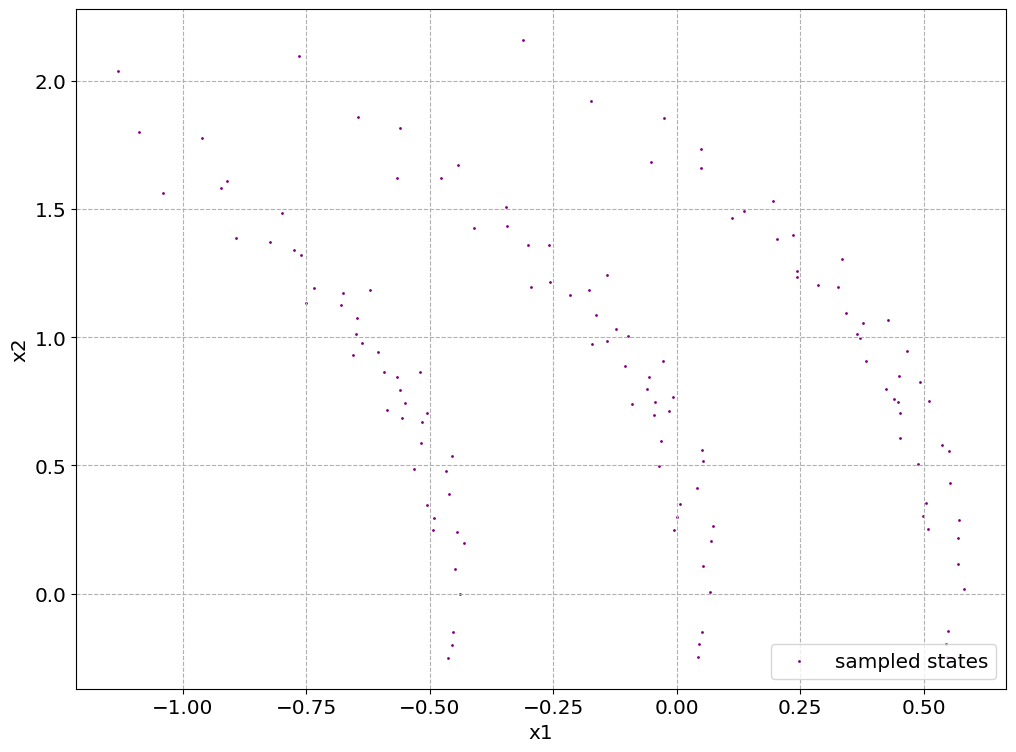

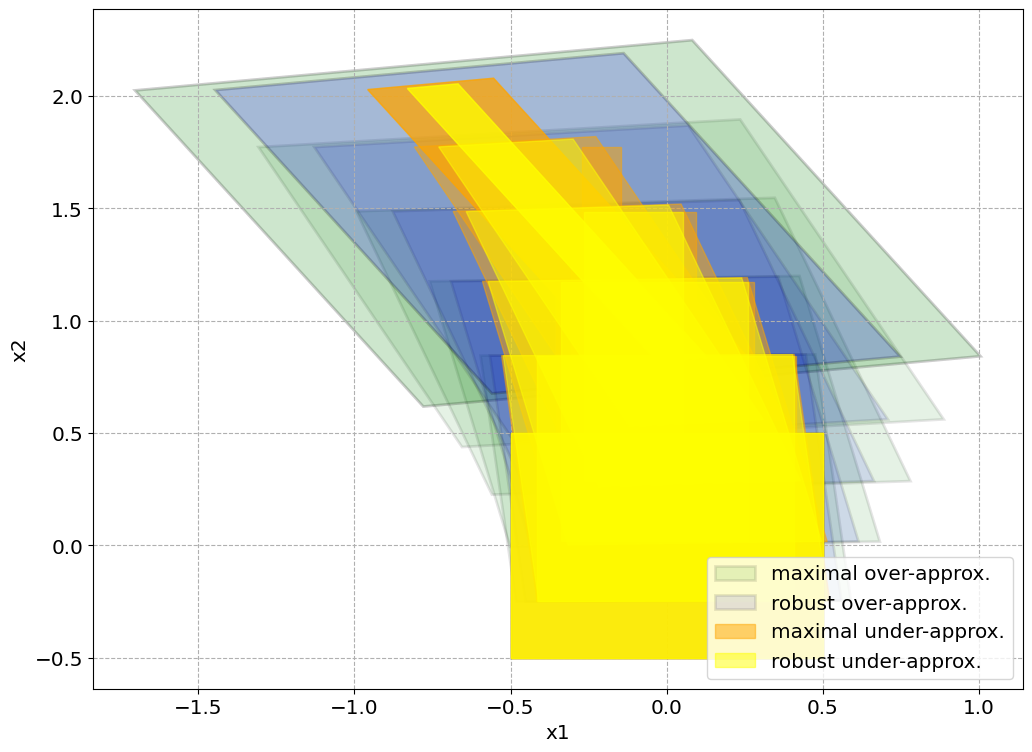

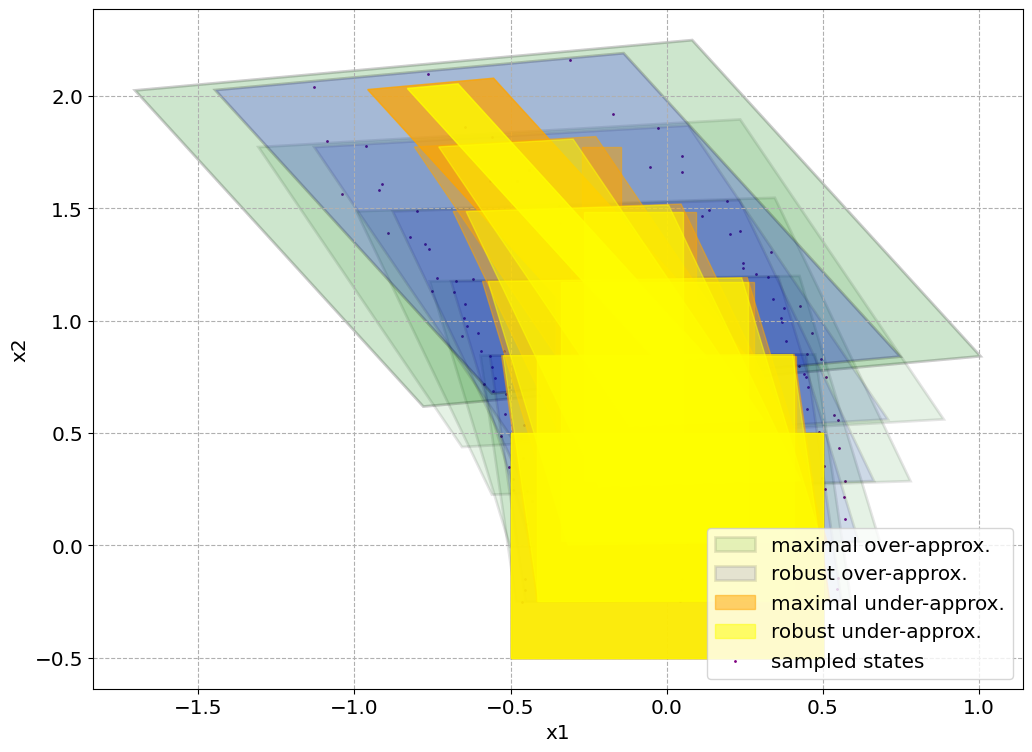

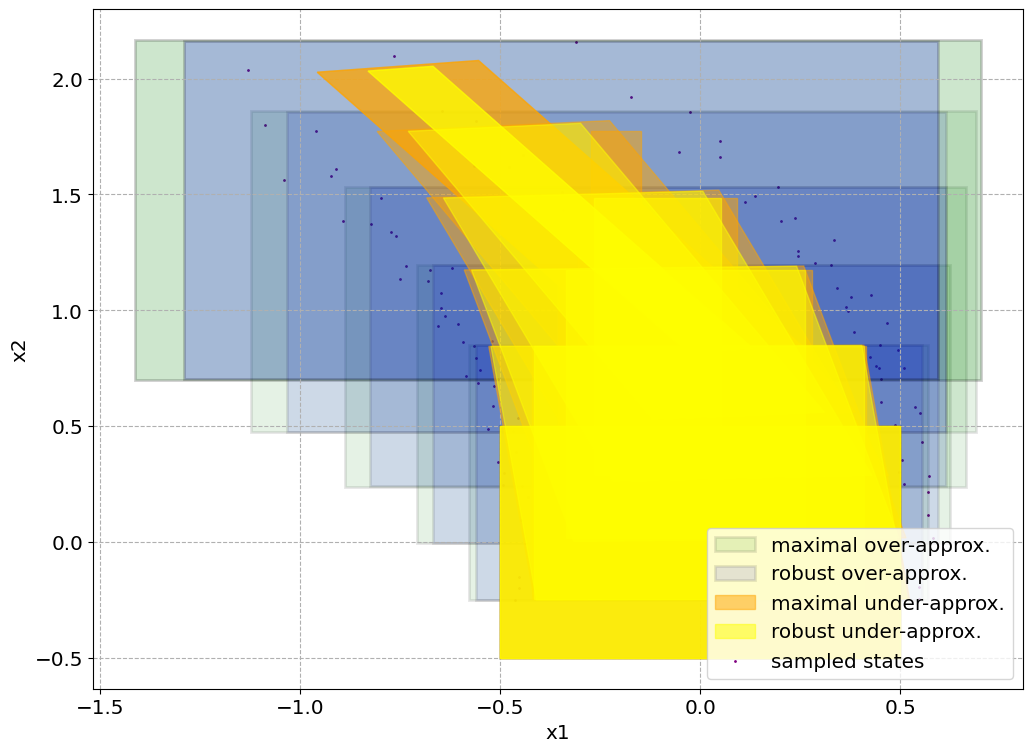

outer2d_robskew=
[-0.55956006  0.67598172 -1.44592052  2.02563266 -0.13756541  2.18964481
  0.74879504  0.83999387]


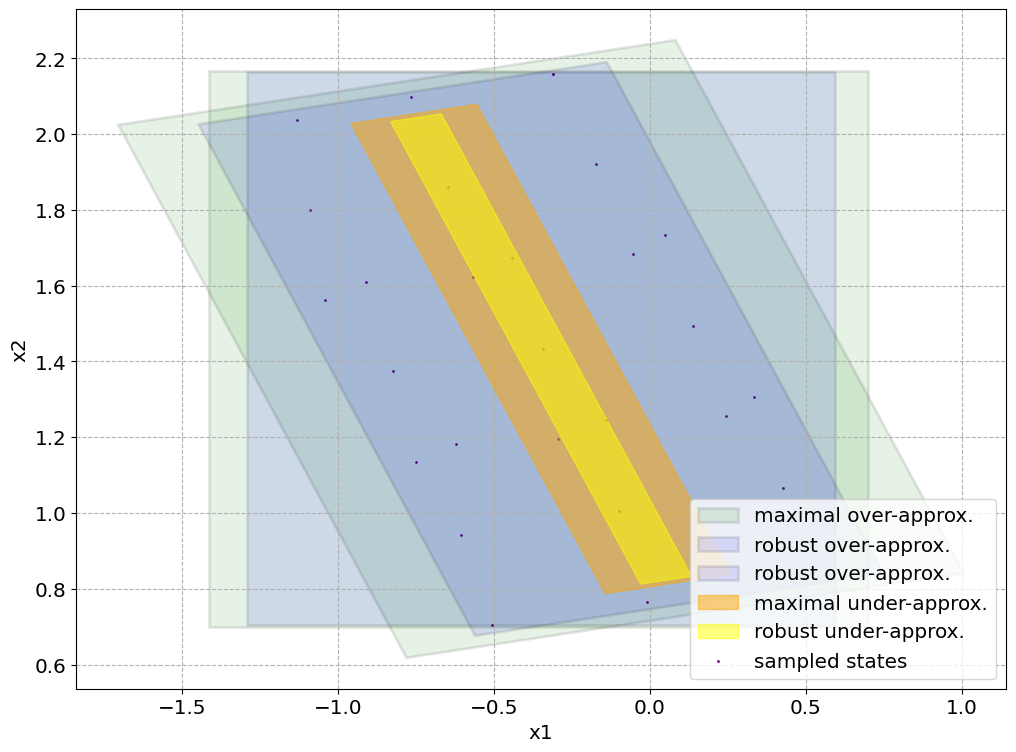

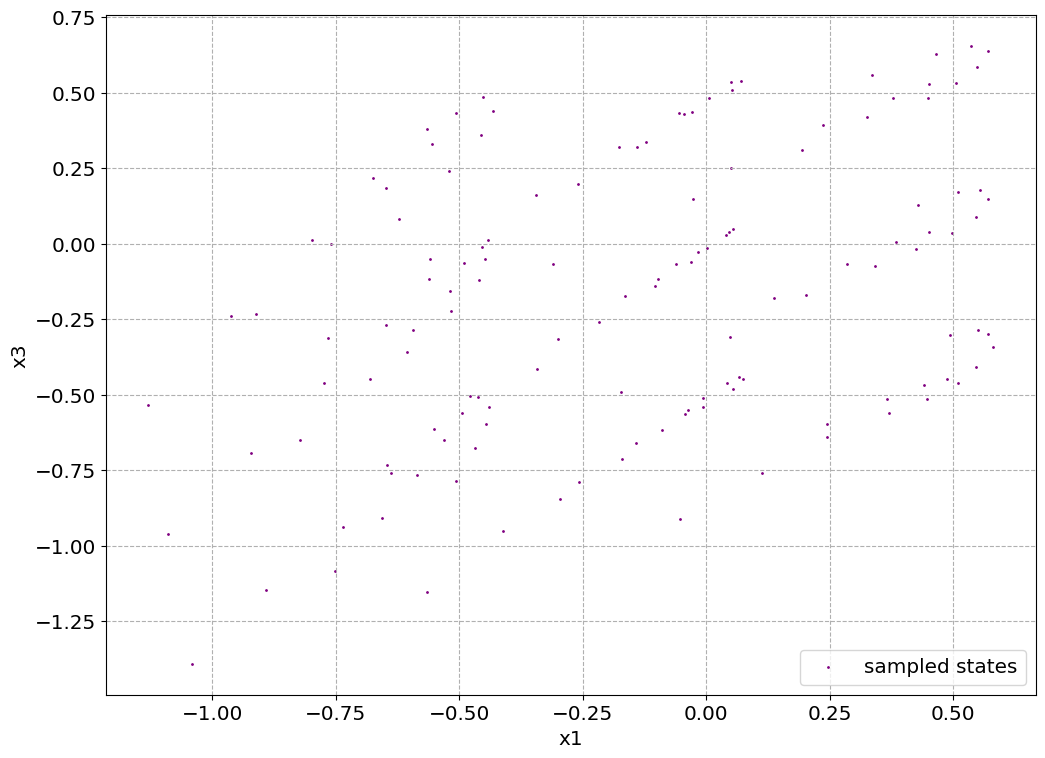

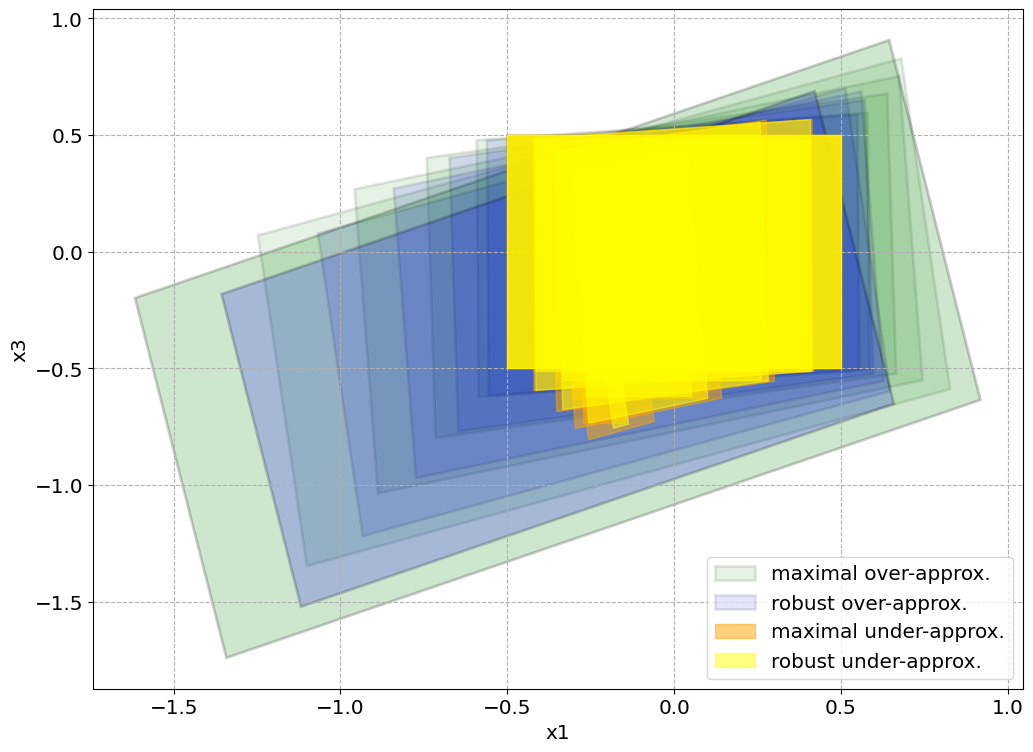

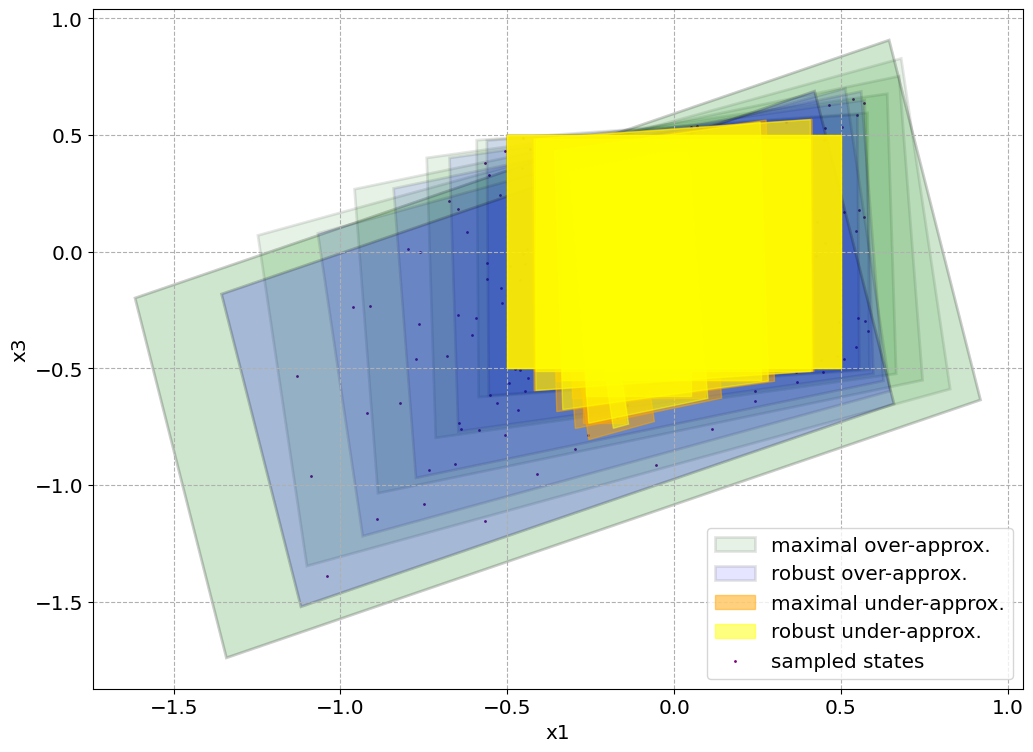

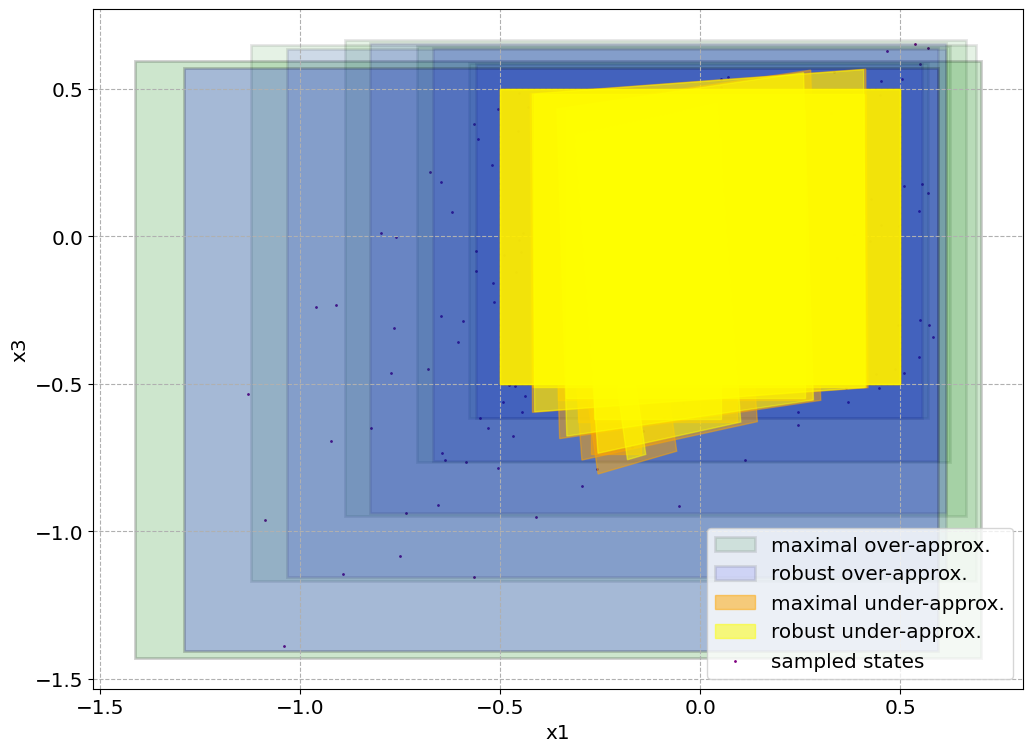

outer2d_robskew=
[-1.1184549  -1.52230009 -1.35649035 -0.18203576  0.42132943  0.68745444
  0.65936488 -0.65280988]


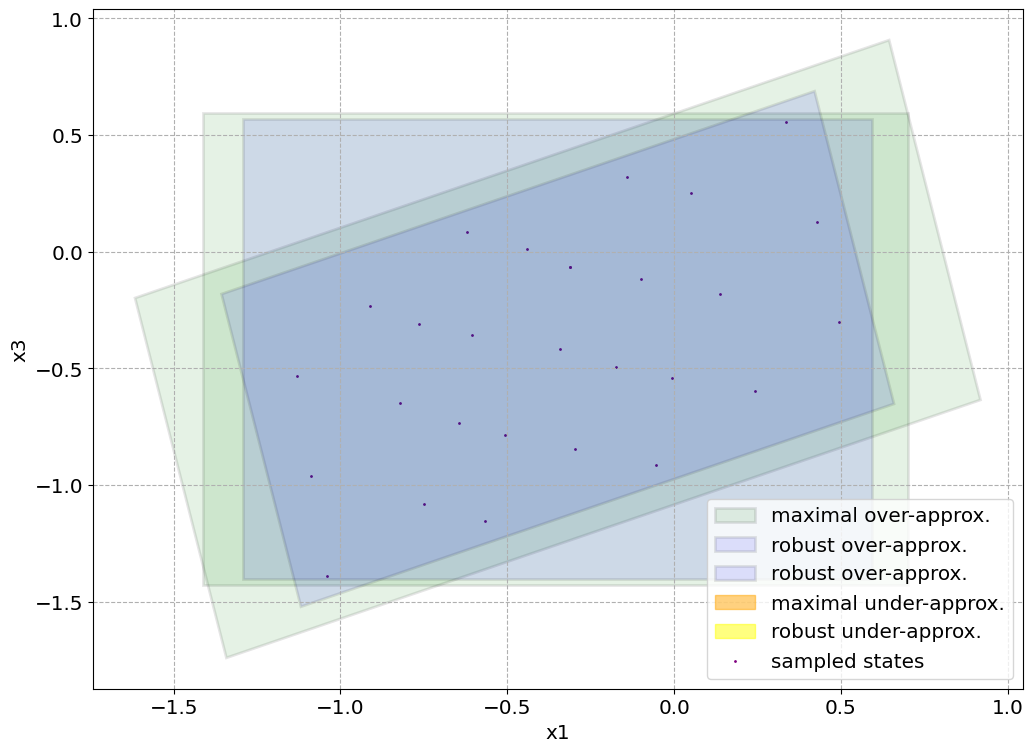

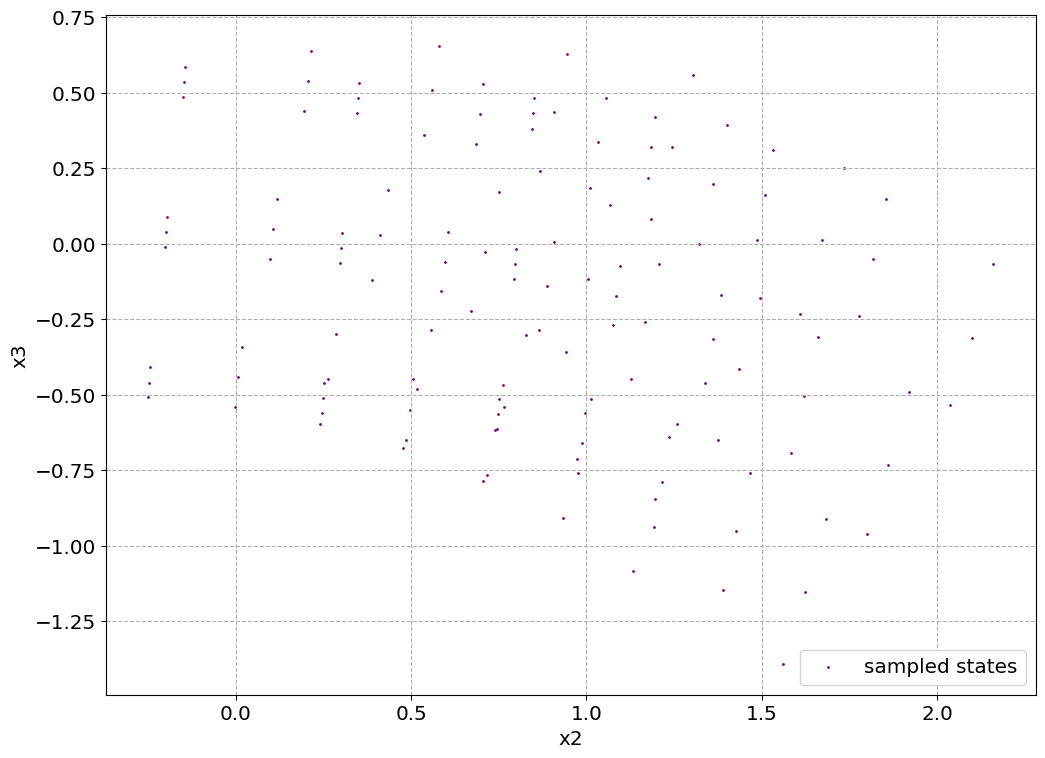

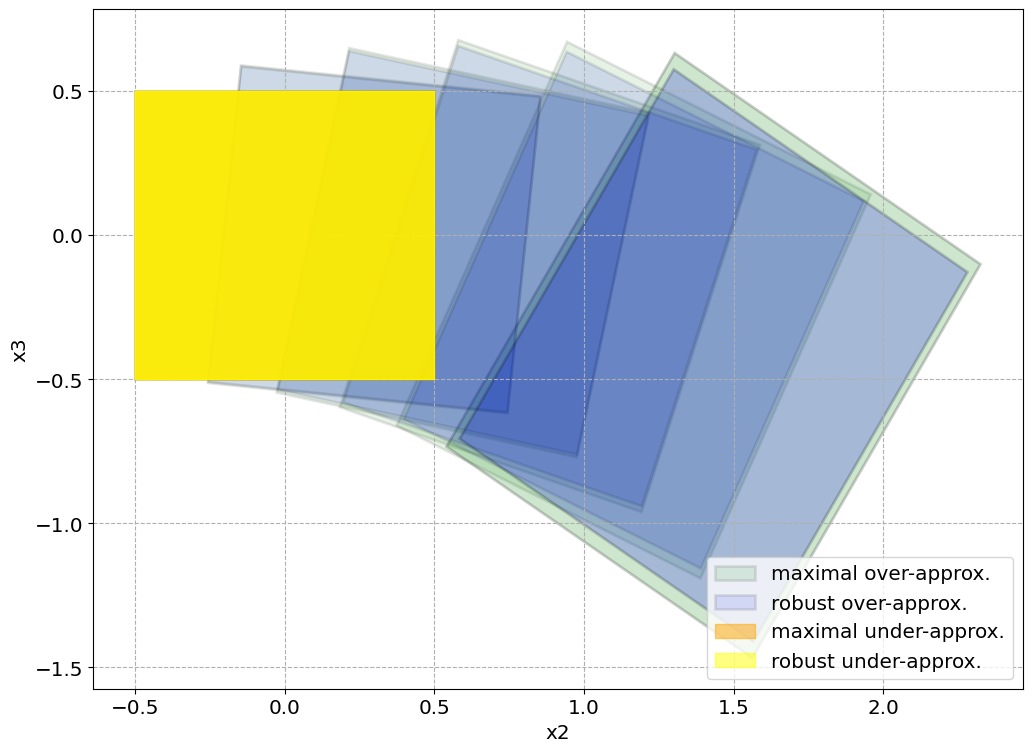

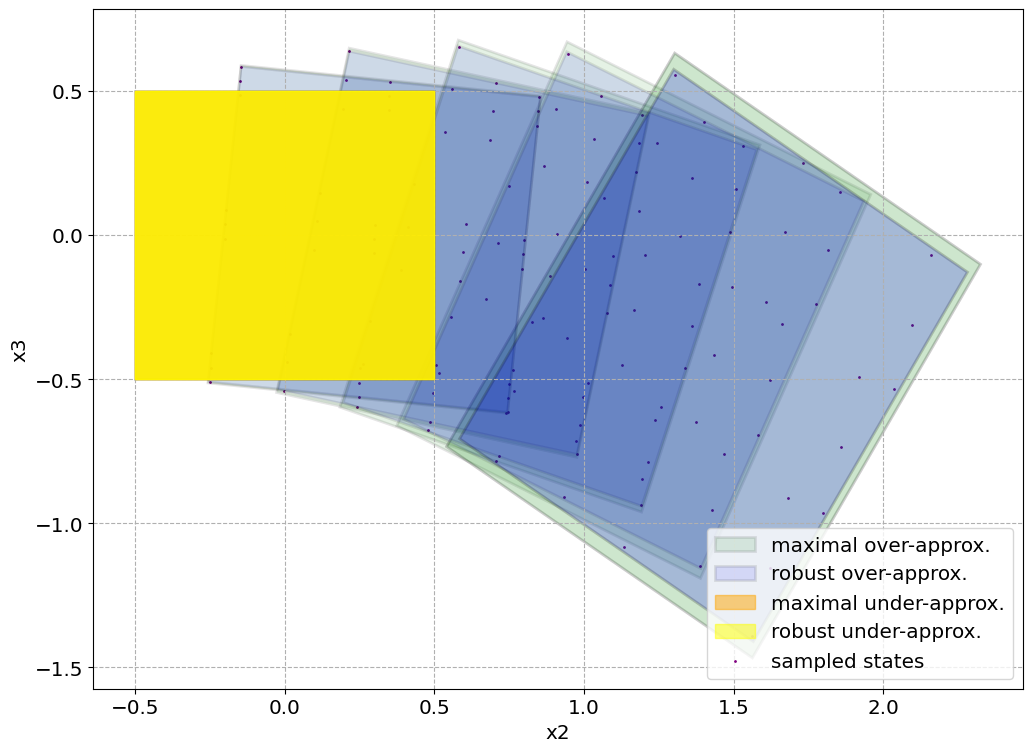

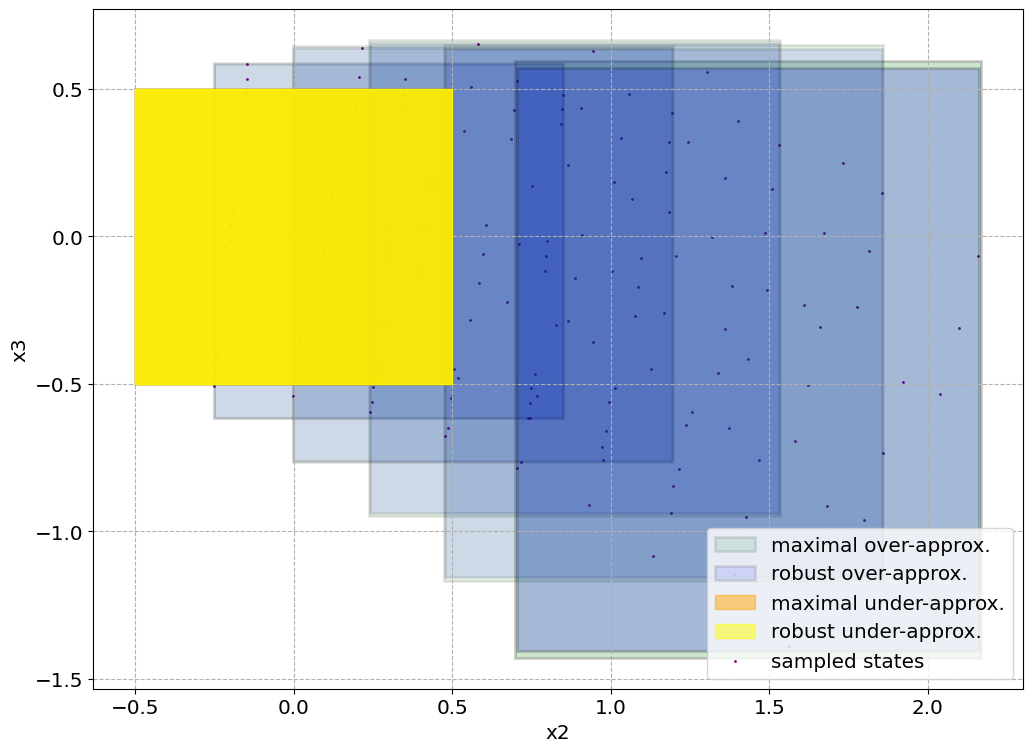

outer2d_robskew=
[ 0.58433064 -0.70644756  1.2998642   0.57541464  2.28129588 -0.12839808
  1.56576232 -1.41026028]


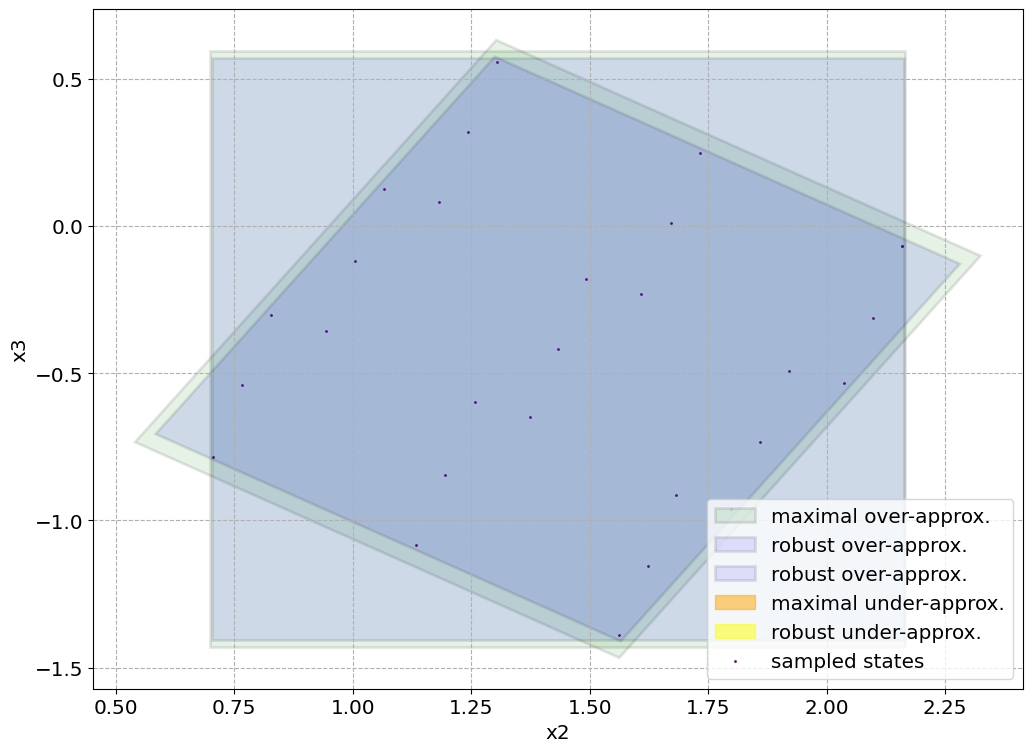

In [181]:
# print joint ranges and sampled joint range of variables to display
for vary in range(sysdim):
    vary_nb = '-' + str(vary+1) + '-'
    for varx in range(vary):
        varx_nb = '-' + str(varx+1) + '-'
        if (re.match(varx_nb,variables_to_display) and re.match(vary_nb,variables_to_display)) or re.match("all",variables_to_display):
            print_xy(varx,vary,True,False,True) # sample and not approx and skew
            print_xy(varx,vary,False,True,True) # not sample and approx and skew
            print_xy(varx,vary,True,True,True)  # sample and approx and skew
            print_xy(varx,vary,True,True,False)  # sample and approx and not skew
            print_finalstate_xy(varx,vary)

In [182]:
# 3D printing in continuous case  (ODEs)

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

def transform(x1,x2,y1,y2,z1,z2):
    
    points = np.array([[-1, -1, -1],
            [1, -1, -1 ],
            [1, 1, -1],
            [-1, 1, -1],
            [-1, -1, 1],
            [1, -1, 1 ],
            [1, 1, 1],
            [-1, 1, 1]])
    
    P = [[(x2-x1)/2 , 0 ,  0],
    [0 ,  (y2-y1)/2 ,  0],
    [0 ,  0 ,  (z2-z1)/2]]
                
    Z = np.array([[(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
    [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
    [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
    [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
    [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
    [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
    [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
    [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2]])
                
    for i in range(8): Z[i,:] += np.dot(points[i,:],P)

    # list of sides' polygons of figure
    verts = [[Z[0],Z[1],Z[2],Z[3]], 
    [Z[4],Z[5],Z[6],Z[7]], 
    [Z[0],Z[1],Z[5],Z[4]], 
    [Z[2],Z[3],Z[7],Z[6]], 
    [Z[1],Z[2],Z[6],Z[5]],
    [Z[4],Z[7],Z[3],Z[0]]]
    
    return verts;


def print_xyz(no_varx,no_vary,no_varz):
   # fig, ax = plt.subplots(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    ax = Axes3D(fig)
    
    points = np.array([[-1, -1, -1],
            [1, -1, -1 ],
            [1, 1, -1],
            [-1, 1, -1],
            [-1, -1, 1],
            [1, -1, 1 ],
            [1, 1, 1],
            [-1, 1, 1]])
    
    # print maximal outer-approximations 
    
    for x1,x2,y1,y2,z1,z2 in zip(zmin_outer[no_varx],zmax_outer[no_varx],zmin_outer[no_vary],zmax_outer[no_vary],zmin_outer[no_varz],zmax_outer[no_varz]):
        P = [[(x2-x1)/2 , 0 ,  0],
            [0 ,  (y2-y1)/2 ,  0],
            [0 ,  0 ,  (z2-z1)/2]]
                
        Z = np.array([[(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
            [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
            [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
            [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
            [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
            [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
            [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
            [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2]])
                
        for i in range(8): Z[i,:] += np.dot(points[i,:],P)

        # plot vertices
        ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])

        # list of sides' polygons of figure
        verts = [[Z[0],Z[1],Z[2],Z[3]], 
        [Z[4],Z[5],Z[6],Z[7]], 
        [Z[0],Z[1],Z[5],Z[4]], 
        [Z[2],Z[3],Z[7],Z[6]], 
        [Z[1],Z[2],Z[6],Z[5]],
        [Z[4],Z[7],Z[3],Z[0]]]
    
    
    # print inner-approximations 
    xi = np.zeros((6), float)
    
    # maximal box inner-approximation
    for no_iter in range(len(inner3d_maxbox)):    
        for i in range(6):
            xi[i] = inner3d_maxbox[no_iter][no_varx][no_vary][no_varz][i]
        verts = transform(xi[0],xi[1],xi[2],xi[3],xi[4],xi[5])
        ax.add_collection3d(Poly3DCollection(verts, facecolors='blue', linewidths=1, edgecolors='b', label='maximal inner-approximation', alpha=.5))      
    
                      
    # robust box inner-approximation
    for no_iter in range(len(inner3d_robbox)):    
        for i in range(6):
            xi[i] = inner3d_robbox[no_iter][no_varx][no_vary][no_varz][i]
        verts = transform(xi[0],xi[1],xi[2],xi[3],xi[4],xi[5])
        ax.add_collection3d(Poly3DCollection(verts, facecolors='orange', linewidths=1, edgecolors='orange', label='robust inner-approximation', alpha=.5))
                      
        
    ax.autoscale()
    varx = 'x'+str(no_varx+1)
    vary = 'x'+str(no_vary+1)
    varz = 'x'+str(no_varz+1)
    ax.set_xlabel(varx)
    ax.set_ylabel(vary)
    ax.set_zlabel(varz)
    #plt.legend()
    f_output= varx + vary + varz
    plt.savefig(f_output)
    if (print_interactive):
        plt.show() 
    plt.close()

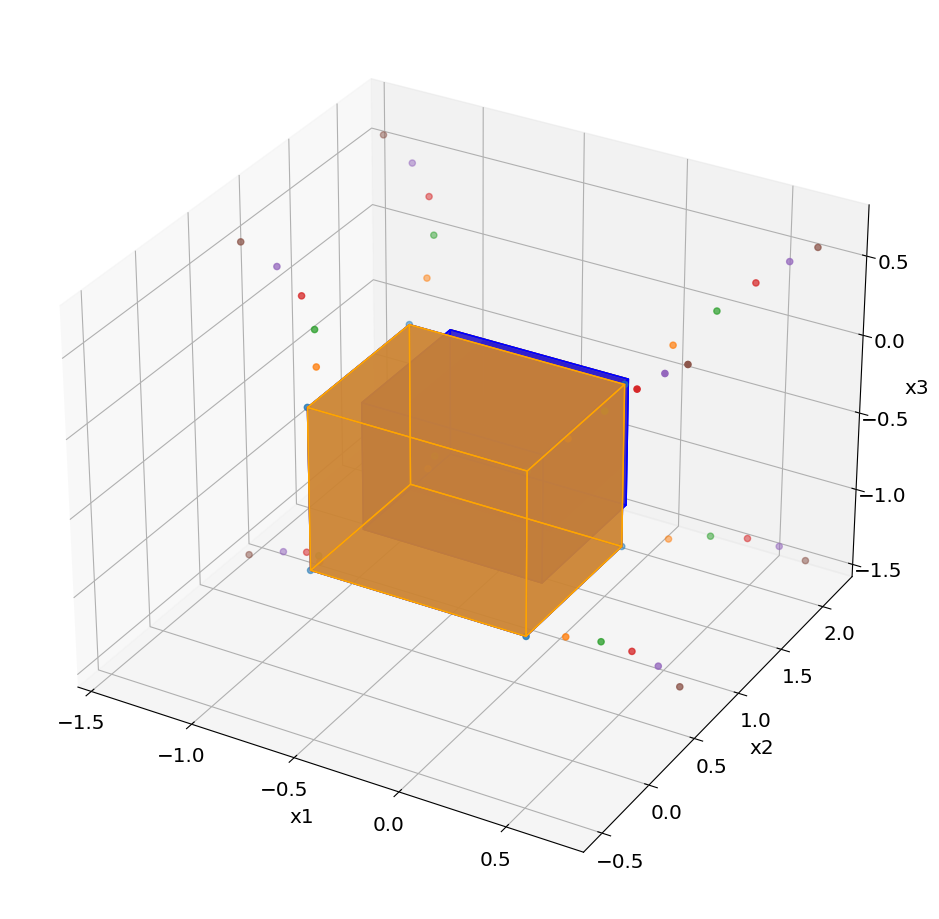

In [183]:
# print joint outer and inner 3D ranges in continuous case (ODEs)
if (systype == 0):  # ODEs
    for varz in range(sysdim):
        varz_nb = '-' + str(varz+1) + '-'
        for vary in range(varz):
            vary_nb = '-' + str(vary+1) + '-'
            for varx in range(vary):
                varx_nb = '-' + str(varx+1) + '-'
                if (re.match(varx_nb,variables_to_display) and re.match(vary_nb,variables_to_display) and re.match(varz_nb,variables_to_display)) or re.match("all",variables_to_display):
                    print_xyz(varx,vary,varz)

In [184]:
# 3D printing in case of discrete-time systems - different from continuous case, x,y as a function of time...
import matplotlib.ticker as mticker

def print3d_discrete_xyt(no_varx,no_vary):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') 
    plt.grid(True,which="both", linestyle='--')
    xi = np.zeros((8), float)
    
    # rectangles
    if len(outer2d_maxskew) == 0:
        for t1,xo1,xo2,yo1,yo2 in zip(approx_tn,zmin_outer[no_varx],zmax_outer[no_varx],zmin_outer[no_vary],zmax_outer[no_vary]):
            Z = np.array([[xo1,t1,yo1], [xo2,t1,yo1], [xo2,t1,yo2], [xo1,t1,yo2]])     
            ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])
            verts = [[Z[0],Z[1],Z[2],Z[3]]]
            ax.add_collection3d(Poly3DCollection(verts, facecolors='g', linewidths=2, edgecolors='g', label='maximal inner-approximation', alpha=.1))
    else:
        for no_iter in range(len(outer2d_maxskew)):
            for i in range(8):
                xi[i] = outer2d_maxskew[no_iter][no_varx][no_vary][i]
            Z = np.array([[xi[0],approx_tn[no_iter],xi[1]], [xi[2],approx_tn[no_iter],xi[3]], [xi[4],approx_tn[no_iter],xi[5]], [xi[6],approx_tn[no_iter],xi[7]]]) 
            # plot vertices
            ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])
            # list of sides' polygons of figure
            verts = [[Z[0],Z[1],Z[2],Z[3]]]
            ax.add_collection3d(Poly3DCollection(verts, facecolors='g', linewidths=2, edgecolors='g', label='maximal inner-approximation', alpha=.1))
        
    for no_iter in range(len(inner2d_maxbox)):                      
        # maximal box inner-approximation
        for i in range(4):
            xi[i] = inner2d_maxbox[no_iter][no_varx][no_vary][i]
        Z = np.array([[xi[0],approx_tn[no_iter],xi[2]], [xi[1],approx_tn[no_iter],xi[2]], [xi[1],approx_tn[no_iter],xi[3]], [xi[0],approx_tn[no_iter],xi[3]]]) 
        ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])
        verts = [[Z[0],Z[1],Z[2],Z[3]]]
        ax.add_collection3d(Poly3DCollection(verts, facecolors='orange', linewidths=2, linestyle='--', edgecolors='b', label='maximal inner-approximation', alpha=.3))
         
    for no_iter in range(len(inner2d_maxskew)):
        for i in range(8):
            xi[i] = inner2d_maxskew[no_iter][no_varx][no_vary][i]
        Z = np.array([[xi[0],approx_tn[no_iter],xi[1]], [xi[2],approx_tn[no_iter],xi[3]], [xi[4],approx_tn[no_iter],xi[5]], [xi[6],approx_tn[no_iter],xi[7]]])                                                                                  
        # plot vertices
        ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])
        # list of sides' polygons of figure
        verts = [[Z[0],Z[1],Z[2],Z[3]]]
        ax.add_collection3d(Poly3DCollection(verts, facecolors='orange', linewidths=2, linestyle='--', edgecolors='b', label='maximal inner-approximation', alpha=.3))
            
       #         ax.scatter3D(z1,t,z2,c='purple',alpha=1.,s=1.,label='estimated reachable states')
        
        
    ax.autoscale()
    varx = 'x'+str(no_varx+1)
    vary = 'x'+str(no_vary+1)
    ax.set_xlabel(varx,fontsize="x-large")
    ax.set_zlabel(vary,fontsize="x-large")
    ax.set_ylabel('step',fontsize="x-large")
    ax.xaxis.set_major_locator(mticker.MaxNLocator(5))
    ax.zaxis.set_major_locator(mticker.MaxNLocator(5))
       # ax.set_zlim3d(0, 25)
     #   plt.legend(fontsize="x-large",loc='center')
    #    plt.legend(fontsize="x-large",loc='lower right')
    f_output= varx + vary + 'time'
    plt.savefig(f_output)

    if (print_interactive):
        plt.show() 
    plt.close()


In [185]:
# 3D printing in discrete time systems - different from continuous case, x,y as a function of time...

if (systype == 2):
    for vary in range(sysdim):
        vary_nb = '-' + str(vary+1) + '-'
        for varx in range(vary):
            varx_nb = '-' + str(varx+1) + '-'
            if (re.match(varx_nb,variables_to_display) and re.match(vary_nb,variables_to_display)) or re.match("all",variables_to_display):
                  print3d_discrete_xyt(varx,vary)

In [186]:
# if print_robust = True: print robust approx
# print maximal approx in any case
# if only_one_graph = True, print all components on same graph
# if subplots = True, print all components on one figure using subplots
# if print_interactive = False, only print in files, otherwise do both
def print_projections(print_robust,print_maximal,print_sample,only_one_graph,subplots,print_interactive,variables_to_display):
    
    nbsubplots = sysdim #len(filenames_outer)
    nbcols = min(3,nbsubplots)
    nbrows = nbsubplots // nbcols
    nbrows += nbsubplots % nbcols
    position=range(1,nbsubplots+1)
    
    # larger figure if everything one one graph
    if (only_one_graph):
        width_in_inches = 10
        height_in_inches = 8
        dots_per_inch = 70
        fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    elif (subplots):
        width_in_inches = 12
        height_in_inches = 4*nbrows
        dots_per_inch = 70
        fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch) 
    else:
        fig = plt.figure()
    
    if (print_robust and print_maximal):
        extension = '_rob_max.png'
    elif (print_robust):
        extension = '_rob.png'
    elif (print_maximal and print_sample):
        extension = '_max_sample.png'
    else:
        extension = '_max.png'
    
    for k in range(nbsubplots):
        variable_nb = '-' + str(k+1) + '-'
        variable = 'x' + str(k+1)
        # print only if variable is in list of variables to display
        if re.match(variable_nb,variables_to_display) or re.match("all",variables_to_display):
            if (subplots):
                ax = fig.add_subplot(nbrows,nbcols,position[k])
            if (print_maximal):
                if (subplots):
                    ax.grid(True,which="both", linestyle='--')
                    ax.fill_between(approx_tn,zmin_inner[k],zmax_inner[k], label='maximal inner approx')
                    if len(approx_tn) > 61 or systype!=2:
                        ax.plot(approx_tn ,zmax_outer[k], color='black', label='maximal outer approx')
                        ax.plot(approx_tn ,zmin_outer[k], color='black')
                    else:
                        ax.plot(approx_tn ,zmax_outer[k], '.-', color='black', label='maximal outer approx')
                        ax.plot(approx_tn ,zmin_outer[k], '.-', color='black')
                    if (len(zmin_exact) > 0):
                        ax.plot(approx_tn ,zmax_exact[k], color='black', linestyle='dashed', label='exact reachable set')
                        ax.plot(approx_tn ,zmin_exact[k], color='black', linestyle='dashed')
                    ax.title.set_text(variable)
                else:
                    plt.grid(True,which="both", linestyle='--')
                    plt.fill_between(approx_tn,zmin_inner[k],zmax_inner[k], label='maximal inner approx')
                    if len(approx_tn) > 61 or systype!=2:
                        plt.plot(approx_tn , zmax_outer[k], color='black', label='maximal outer approx')
                        plt.plot(approx_tn , zmin_outer[k], color='black')
                    else:
                        plt.plot(approx_tn , zmax_outer[k], '.-', color='black', label='maximal outer approx')
                        plt.plot(approx_tn , zmin_outer[k], '.-', color='black')
                    if (len(zmin_exact) > 0):
                        plt.plot(approx_tn , zmax_exact[k], color='black', linestyle='dashed', label='exact reachable set')
                        plt.plot(approx_tn , zmin_exact[k], color='black', linestyle='dashed')
            
            if (print_sample):
                if (subplots):
                    ax.scatter(sample_tn,sample_z[k],c='purple',alpha=1.,s=1.,label='estimated reachable states')
                else:
                    plt.scatter(sample_tn,sample_z[k],c='purple',alpha=1.,s=1.,label='estimated reachable states') 
                
            if (print_robust and (len(zmin_outer_rob) > 0)):
                if (subplots and print_robust):
                    ax.plot(approx_tn, zmax_outer_rob[k], color='green', label='robust outer approx')
                    ax.plot(approx_tn ,zmin_outer_rob[k], color='green')
                    ax.fill_between(approx_tn,zmin_inner[k],zmax_inner[k], label='robust inner approx')
                elif (print_robust):
                    plt.plot(approx_tn, zmax_outer_rob[k], color='green', label='robust outer approx')
                    plt.plot(approx_tn ,zmin_outer_rob[k], color='green')
                    plt.fill_between(approx_tn,zmin_inner[k],zmax_inner[k], label='robust inner approx')
             
            
            if ((not only_one_graph) and (not subplots)):
                plt.legend() # add the legend specified by the above labels
                plt.title(variable)
                f_output = variable + extension
                plt.savefig(f_output) # save to file
                if (print_interactive):
                    plt.show() # print 
                plt.close()
                fig = plt.figure()
                
    if (only_one_graph or subplots):
        if (only_one_graph):
            plt.title("All components")
            f_output = 'xi' + extension
        if (subplots):
            f_output = 'xi_subplots' + extension
        plt.savefig(f_output)    
        if (print_interactive):
            plt.show() # print all components on same graph
        plt.close()


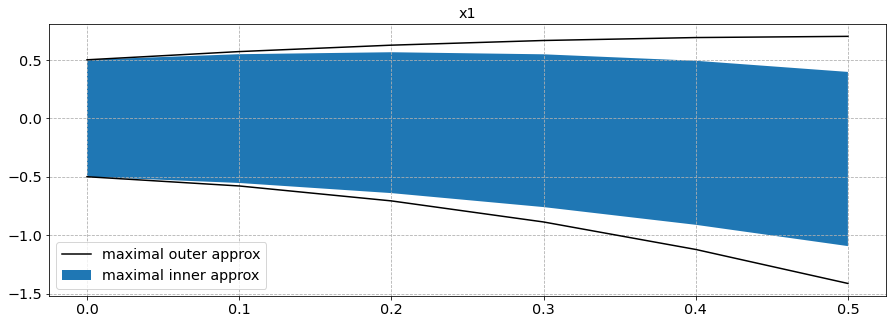

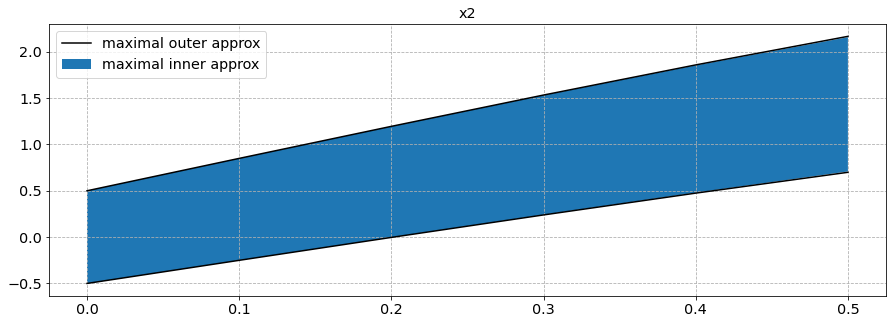

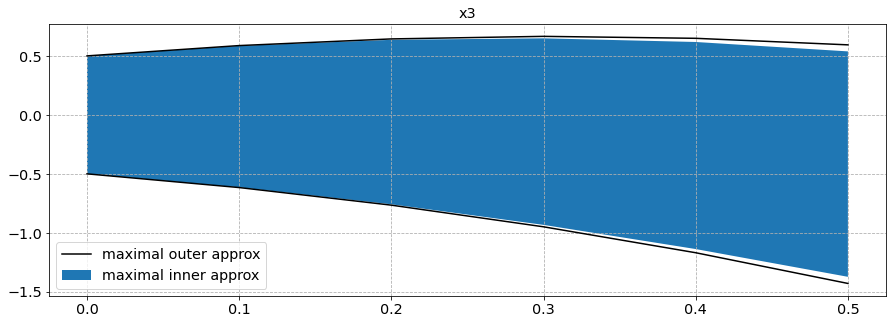

<Figure size 1080x360 with 0 Axes>

In [187]:
print_robust = False
print_maximal = True
print_sample = False
only_one_graph = False
subplots = False

print_projections(print_robust,print_maximal,print_sample,only_one_graph,subplots,print_interactive,variables_to_display)

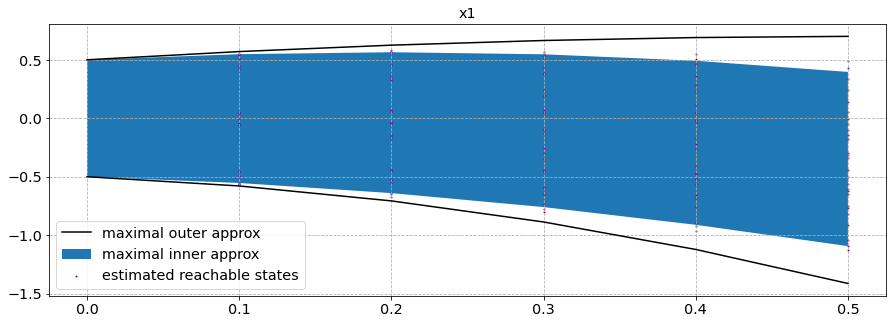

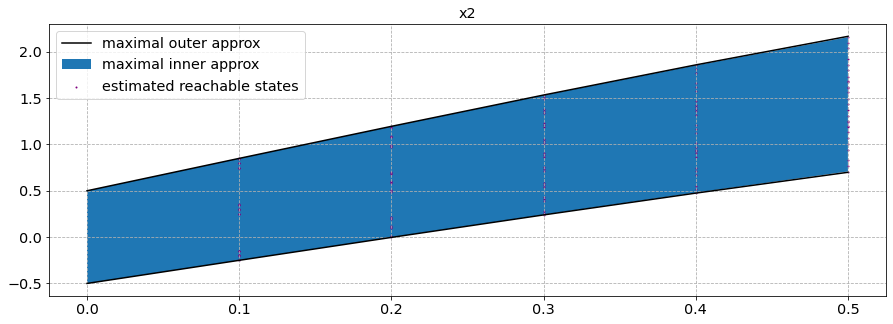

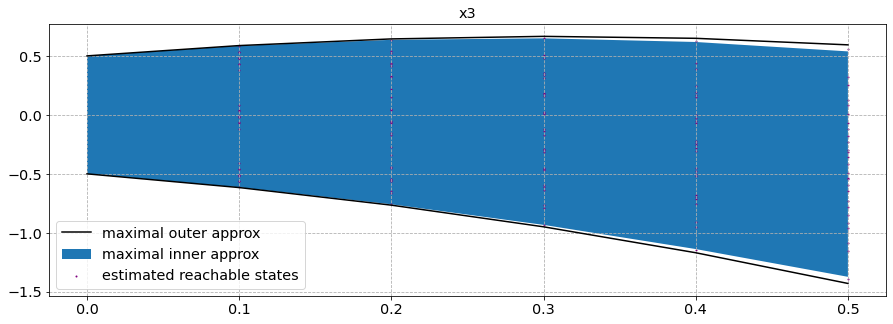

<Figure size 1080x360 with 0 Axes>

In [188]:
if (not samples_absent):
    print_robust = False
    print_sample = True
    only_one_graph = False
    subplots = False

    print_projections(print_robust,print_maximal,print_sample,only_one_graph,subplots,print_interactive,variables_to_display)

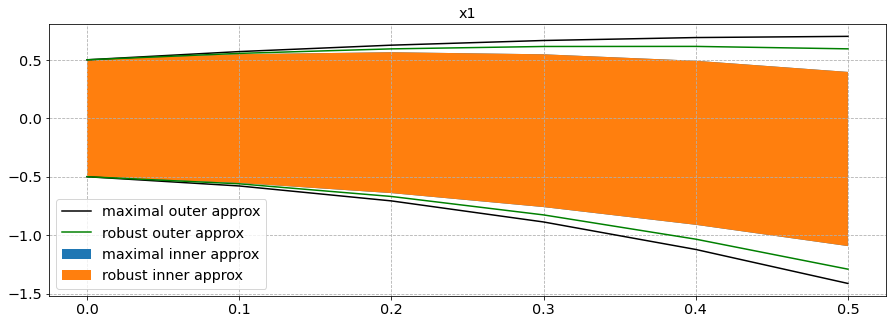

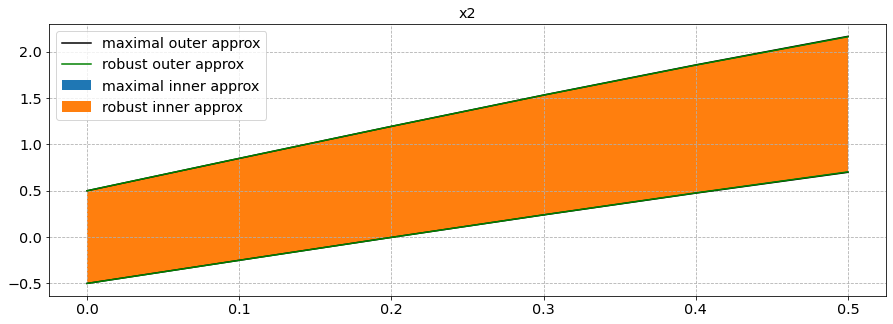

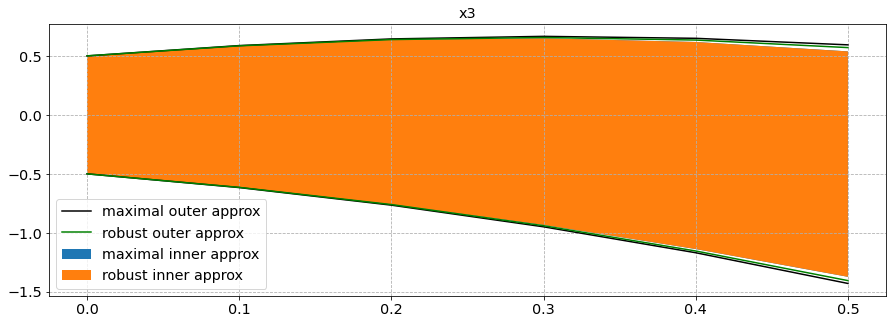

<Figure size 1080x360 with 0 Axes>

In [189]:
print_robust = True
print_sample = False
only_one_graph = False
subplots = False

print_projections(print_robust,print_maximal,print_sample,only_one_graph,subplots,print_interactive,variables_to_display)

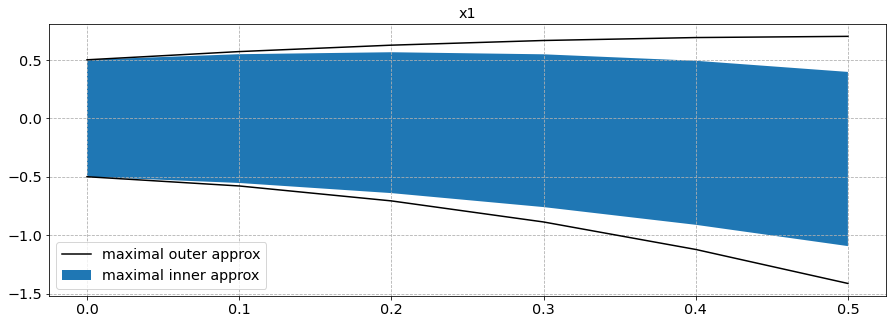

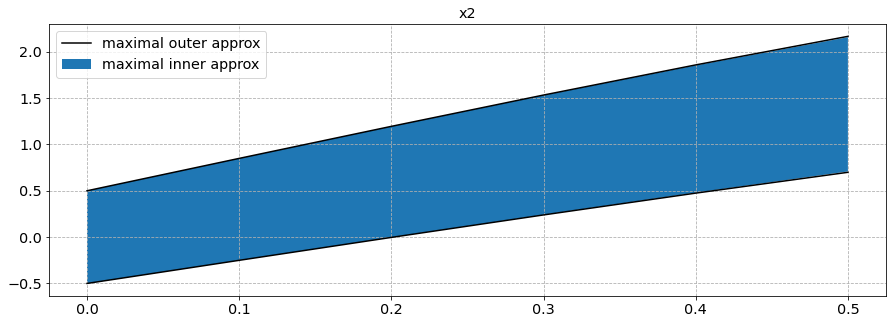

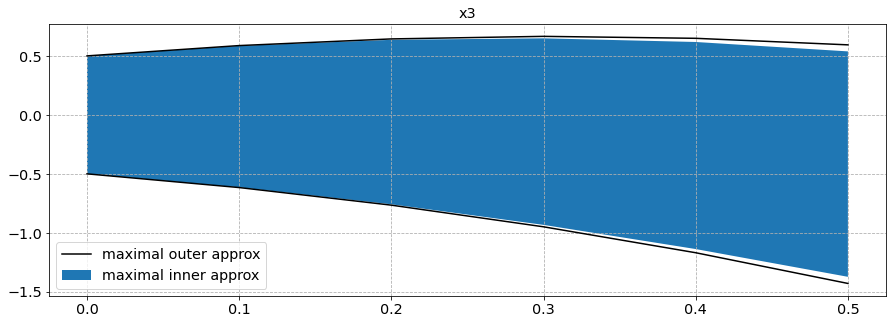

<Figure size 1080x360 with 0 Axes>

In [190]:
print_robust = False
print_maximal = True
only_one_graph = False
subplots = False

print_projections(print_robust,print_maximal,print_sample,only_one_graph,subplots,print_interactive,variables_to_display)

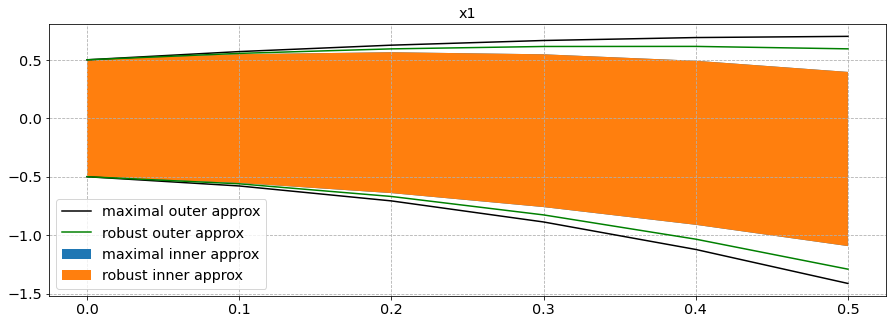

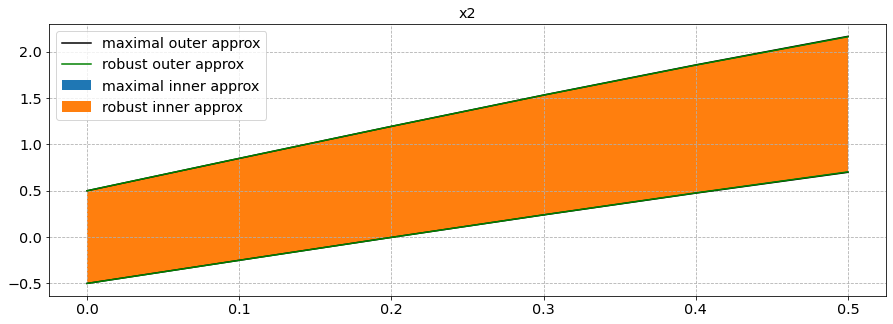

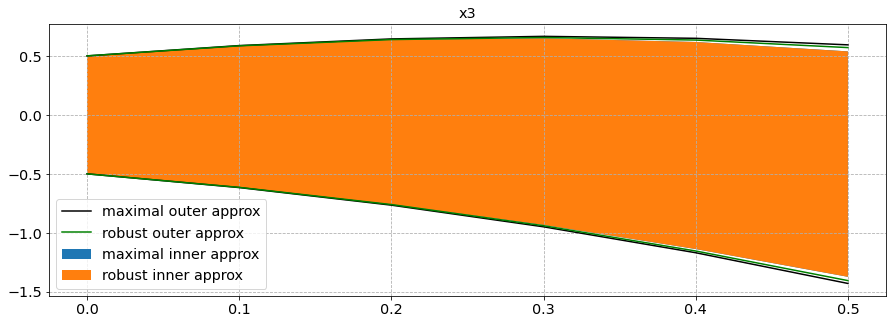

<Figure size 1080x360 with 0 Axes>

In [191]:
print_robust = True
print_maximal = True
only_one_graph = False
subplots = False

print_projections(print_robust,print_maximal,print_sample,only_one_graph,subplots,print_interactive,variables_to_display)

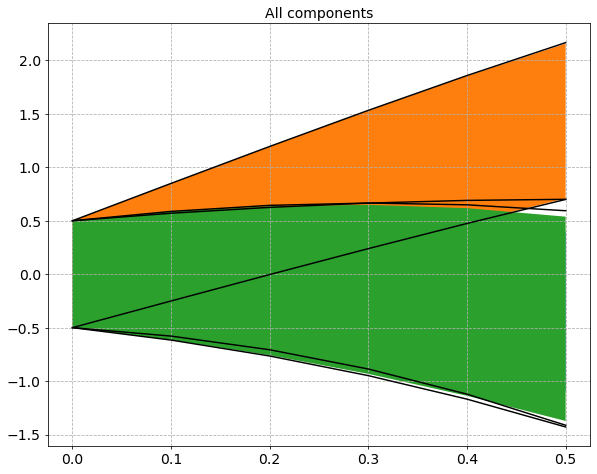

In [192]:
print_robust = False
only_one_graph = True
subplots = False
print_projections(print_robust,print_maximal,print_sample,only_one_graph,subplots,print_interactive,variables_to_display)

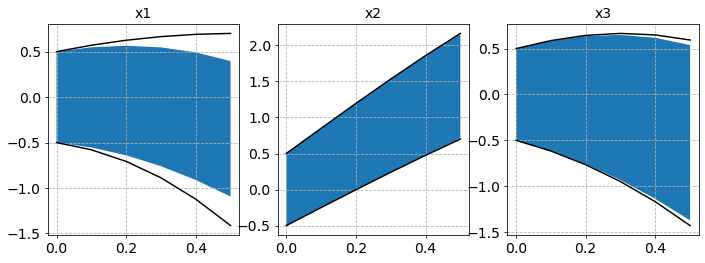

In [193]:
print_robust = False
only_one_graph = False
subplots = True
print_projections(print_robust,print_maximal,print_sample,only_one_graph,subplots,print_interactive,variables_to_display)

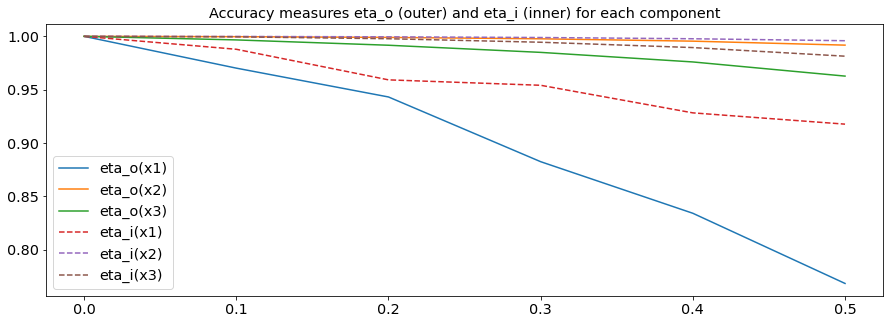

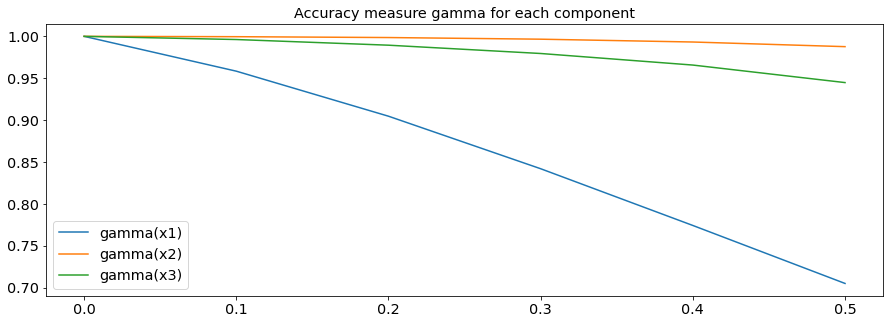

In [194]:
if 'etaouter' in approx[0]:
    fig = plt.figure()
    for k in range(sysdim):
        plt.plot(approx_tn , etaouter[k], label='eta_o(x'+str(k+1)+')')
    for k in range(sysdim):    
        plt.plot(approx_tn , etainner[k], label='eta_i(x'+str(k+1)+')', linestyle='dashed')
    plt.legend() # add the legend specified by the above labels
    plt.title("Accuracy measures eta_o (outer) and eta_i (inner) for each component")
    plt.savefig("eta.png") # save to file
    if (print_interactive):
        plt.show() # print
    plt.close()

if 'gamma' in approx[0]:
    fig = plt.figure()
    for k in range(sysdim):
        plt.plot(approx_tn , gamma[k], label='gamma(x'+str(k+1)+')')
    plt.legend() # add the legend specified by the above labels
    plt.title("Accuracy measure gamma for each component")
    plt.savefig("gamma.png") # save to file
    if (print_interactive):
        plt.show() # print
    plt.close()

In [195]:
print_interactive = False

# mean on xi of error between outer-approx and analytical solution if any
if (len(meanerrorinner) > 0):
    fig = plt.figure()
    plt.plot(approx_tn, meanerrorinner, label='Distance of inner approximation to exact solution')
    plt.plot(approx_tn, meanerrorouter, label='Distance of outer approximation to exact solution')
    plt.legend() # add the legend specified by the above labels
    plt.title("Mean on xi of distance to exact solution")
    plt.savefig("meanerror.png") # save to file
    if (print_interactive):
        plt.show() # print
    plt.close()

In [196]:
# mean on xi of error between outer-approx and analytical solution if any
if (len(relmeanerrorinner) > 0):
    fig = plt.figure()
    plt.plot(approx_tn, relmeanerrorinner, label='Relative distance of inner approximation to exact solution')
    plt.plot(approx_tn, relmeanerrorouter, label='Relative distance of outer approximation to exact solution')
    plt.legend() # add the legend specified by the above labels
    plt.title("Mean on xi of relative distance to exact solution")
    plt.savefig("meanrelativeerror.png") # save to file
    if (print_interactive):
        plt.show() # print
    plt.close()